# Check KS 3.0 preprocessed traces

purpose: check that spikes are visible.


note:

- spikeinterface.preprocessing.remove_bad_channels
- recording.remove_channels(bad_channel_ids)
- bad_channel_ids, channel_labels = si.detect_bad_channels(rec1) # not in this version

### Setup

In [1]:
import spikeinterface as si
from matplotlib import pyplot as plt

# path where Kilosort 3.0 saves preprocessed file when sorting is run
ks3_preprocessed_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/sorting/1_vivo/marques/campaign/recording_c26/KS3_output/temp_wh.dat"

### Plot

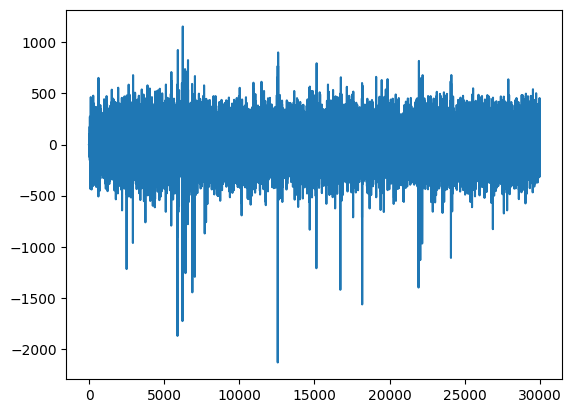

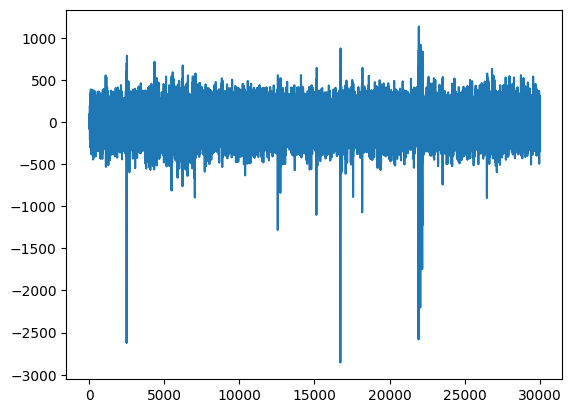

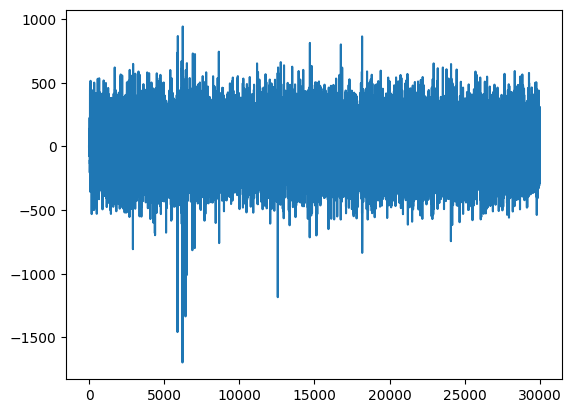

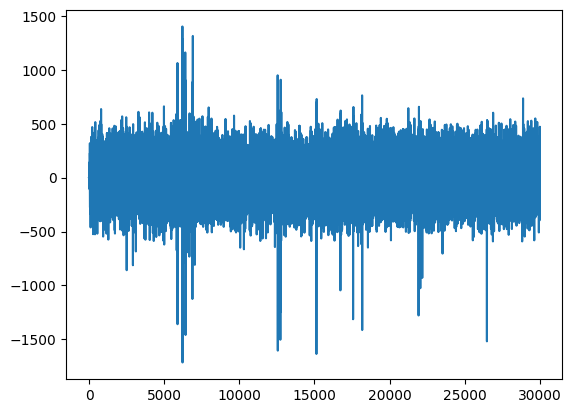

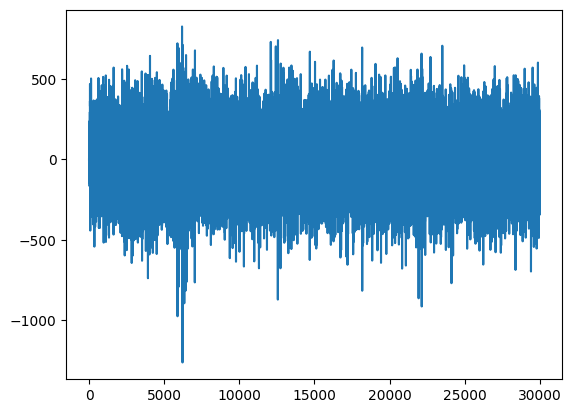

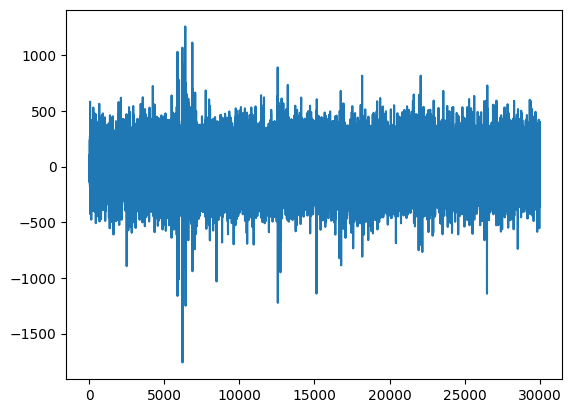

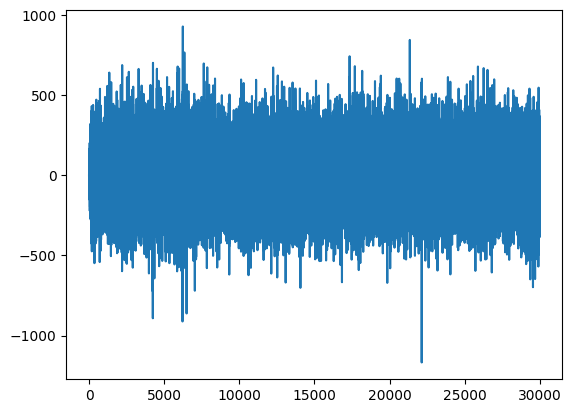

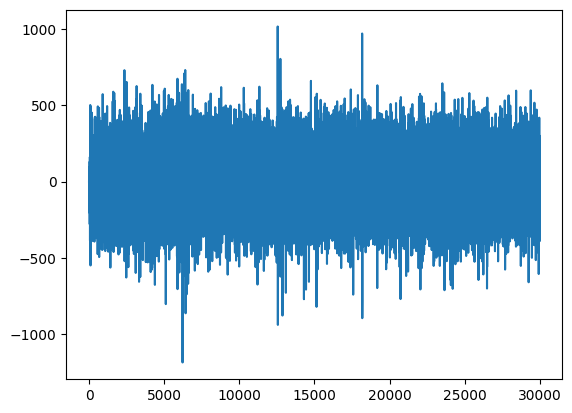

In [2]:
# load recording
Recording = si.read_binary(
    ks3_preprocessed_path, sampling_frequency=30000, num_chan=384, dtype="int16"
)
traces = Recording.get_traces()

# plot one second segment
plt.plot(traces[:30000, 0])
plt.show()
plt.plot(traces[:30000, 1])
plt.show()
plt.plot(traces[:30000, 2])
plt.show()
plt.plot(traces[:30000, 3])
plt.show()
plt.plot(traces[:30000, 4])
plt.show()
plt.plot(traces[:30000, 5])
plt.show()
plt.plot(traces[:30000, 6])
plt.show()
plt.plot(traces[:30000, 7])

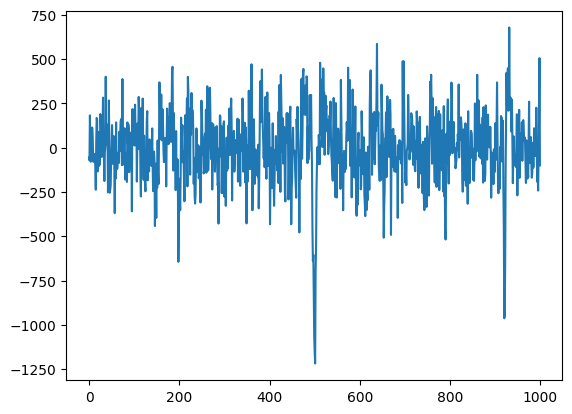

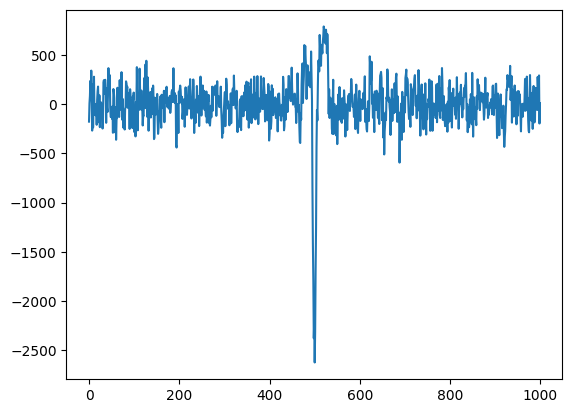

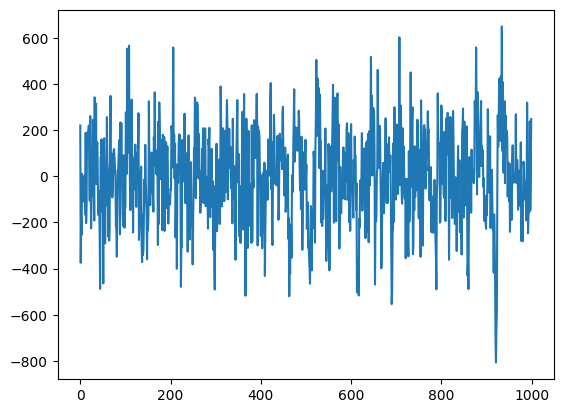

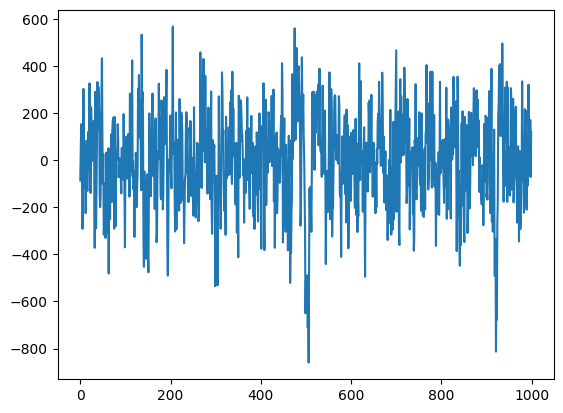

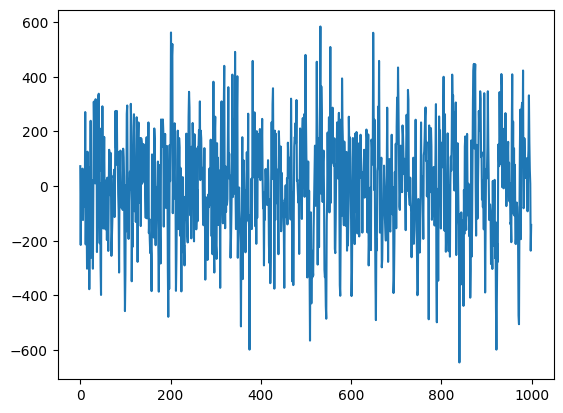

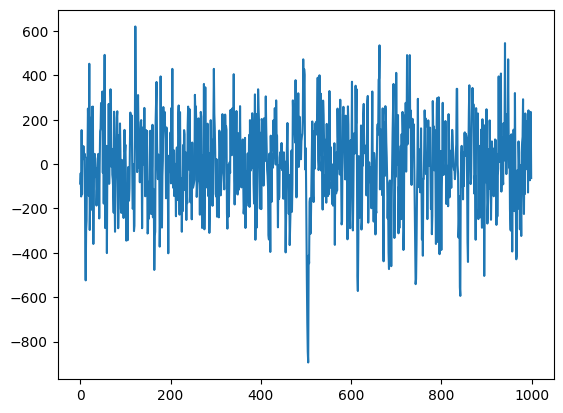

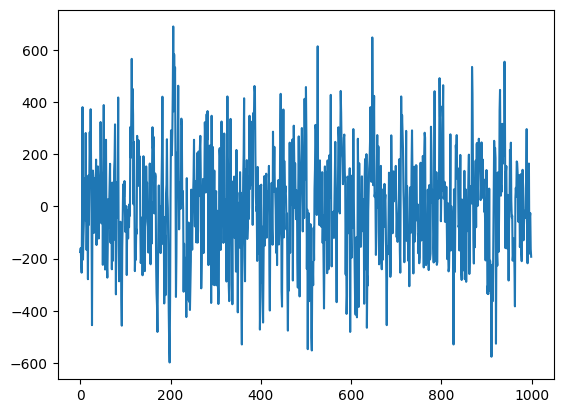

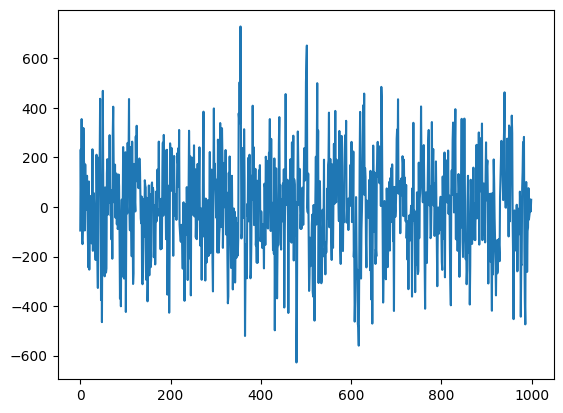

In [3]:
# zoom on a spike
plt.plot(traces[2000:3000, 0])
plt.show()
plt.plot(traces[2000:3000, 1])
plt.show()
plt.plot(traces[2000:3000, 2])
plt.show()
plt.plot(traces[2000:3000, 3])
plt.show()
plt.plot(traces[2000:3000, 4])
plt.show()
plt.plot(traces[2000:3000, 5])
plt.show()
plt.plot(traces[2000:3000, 6])
plt.show()
plt.plot(traces[2000:3000, 7])

In [5]:
# Recording.remove_channels
import spikeinterface.preprocessing as pre

RecordingClean = pre.RemoveBadChannelsRecording(Recording)

In [12]:
traces = RecordingClean.get_traces()

(36514560, 384)

In [39]:
import os
import numpy as np

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# silico
data_conf_sili, param_conf_sili = get_config(
    "silico_neuropixels", "2023_10_18"
).values()
WIRED = data_conf_sili["probe_wiring"]["output"]

Recording = si.load_extractor(WIRED)

# remove layers outside of the cortex
layer = Recording.get_property("layers")
bad_channels = np.where(layer == "Outside")[0]
Test = Recording.remove_channels(bad_channels)
probe = Test.get_probe()

len(probe.contact_ids)

2024-01-17 21:10:29,323 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-17 21:10:29,339 - root - utils.py - get_config - INFO - Reading experiment config. - done


202